

---



# | **Project** |

<div align="center">
    <h1 style="color: blue; font-weight: bold;">Heart Disease Prediction</h1>
    <p>Building and Deploying the Best Machine Learning Model</p>
</div>




---



## Imports

In [ ]:
# Installing LuciferML
!pip install lucifer-ml

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from luciferml.supervised.classification import Classification
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



---



## Data Identification / Collection

 ### Dataset Overview:

**Data Source:** UCI Data Repository

**Dataset:** [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

### About Dataset:

### Context:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

 ### Content:

**Attribute Information:**

| **Attribute** | **Description** |
|---------------|-----------------|
| **Age**       | Age of the patient in years |
| **Origin**    | Place of study |
| **Sex**       | Male/Female |
| **CP**        | Chest pain type (4 values: [typical angina, atypical angina, non-anginal, asymptomatic]) |
| **Trestbps**  | Resting blood pressure (in mm Hg on admission to the hospital) |
| **Chol**      | Serum cholesterol in mg/dl |
| **FBS**       | Fasting blood sugar > 120 mg/dl (True/False) |
| **Restecg**   | Resting electrocardiographic results (Values: [normal, stt abnormality, lv hypertrophy]) |
| **Thalach**   | Maximum heart rate achieved |
| **Exang**     | Exercise-induced angina (True/False) |
| **Oldpeak**   | ST depression induced by exercise relative to rest |
| **Slope**     | The slope of the peak exercise ST segment |
| **CA**        | Number of major vessels (0-3) colored by fluoroscopy |
| **Thal**      | Thalassemia (Values: [normal; fixed defect; reversible defect]) |
| **Num**       | The predicted attribute (diagnosis) |


**Note:**

'num' is the predicted attribute, where:

- 0: Indicates the No heart disease (absence of disease).
- 1-4: Represents the presence of heart disease, with increasing levels of severity.
The specific interpretation of values 1 through 4 may vary depending on the dataset, but they typically reflect the degree or extent of the disease.
  ```
  1: Mild heart disease.
  2: Moderate heart disease.
  3: Severe heart disease.
  4: Very severe heart disease.
  ```


### Installing and Fetching Dataset using UCI ML Repo

In [ ]:
# Install repo
! pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa



---



## Data Preparation

### Data Exploration

In [ ]:
X.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
12,56,1,3,130,256,1,2,142,1,0.6,2,1.0,6.0
55,54,1,4,124,266,0,2,109,1,2.2,2,1.0,7.0
161,77,1,4,125,304,0,2,162,1,0.0,1,3.0,3.0
156,51,1,4,140,299,0,0,173,1,1.6,1,0.0,7.0
105,54,1,2,108,309,0,0,156,0,0.0,1,0.0,7.0
214,52,1,4,112,230,0,0,160,0,0.0,1,1.0,3.0
150,52,1,1,152,298,1,0,178,0,1.2,2,0.0,7.0
190,50,1,3,129,196,0,0,163,0,0.0,1,0.0,3.0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0
162,54,0,3,110,214,0,0,158,0,1.6,2,0.0,3.0


In [ ]:
y.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
display(X.isnull().sum())
print('\n')
display(y.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,0
num,0


### Data Preprocessing & Visualization

#### Handling Missing Values



In [ ]:
# Creating a imputer for numerical cols (mean imputation)
num_imputer =  SimpleImputer(strategy='mean')

# Imputing missing values in numerical columns
X[['ca','thal']] = num_imputer.fit_transform(X[['ca','thal']])

# Verfiying
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#### Target Distribution

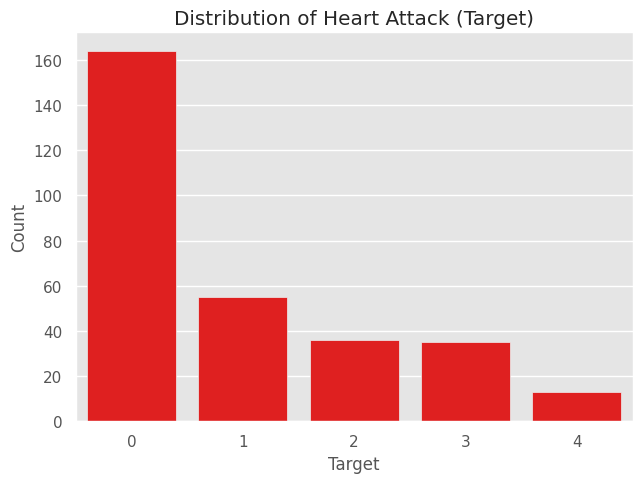

In [ ]:
sns.countplot(x=y.values.ravel(), color ='red')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Heart Attack (Target)')
plt.show()


We can observe that heart disease is classified into four stages. Depending on the problem, we can convert it into a binary classification problem by assigning all non-zero values (1, 2, 3, 4) as a positive label, indicating the presence of heart disease, and 0 as a negative label, indicating its absence.


In [ ]:
# Converting all values greater than 0 in the 'num' column to 1
y = (y > 0).astype(int)   # df['num'] = (df['num'] > 0).astype(int)
y.value_counts()

,count
num,
0,164
1,139


In [ ]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([164, 139]))


Else, we can handle the imbalances with advanced ML methods and techniques.

#### Numerical Columns Distributions

In [ ]:
# Descriptive stats
X.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='copper').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.438944,9.038662,29.000000,48.000000,56.000000,61.000000,77.000000
sex,303.000000,0.679868,0.467299,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,3.158416,0.960126,1.000000,3.000000,3.000000,4.000000,4.000000
trestbps,303.000000,131.689769,17.599748,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.693069,51.776918,126.000000,211.000000,241.000000,275.000000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.990099,0.994971,0.000000,0.000000,1.000000,2.000000,2.000000
thalach,303.000000,149.607261,22.875003,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


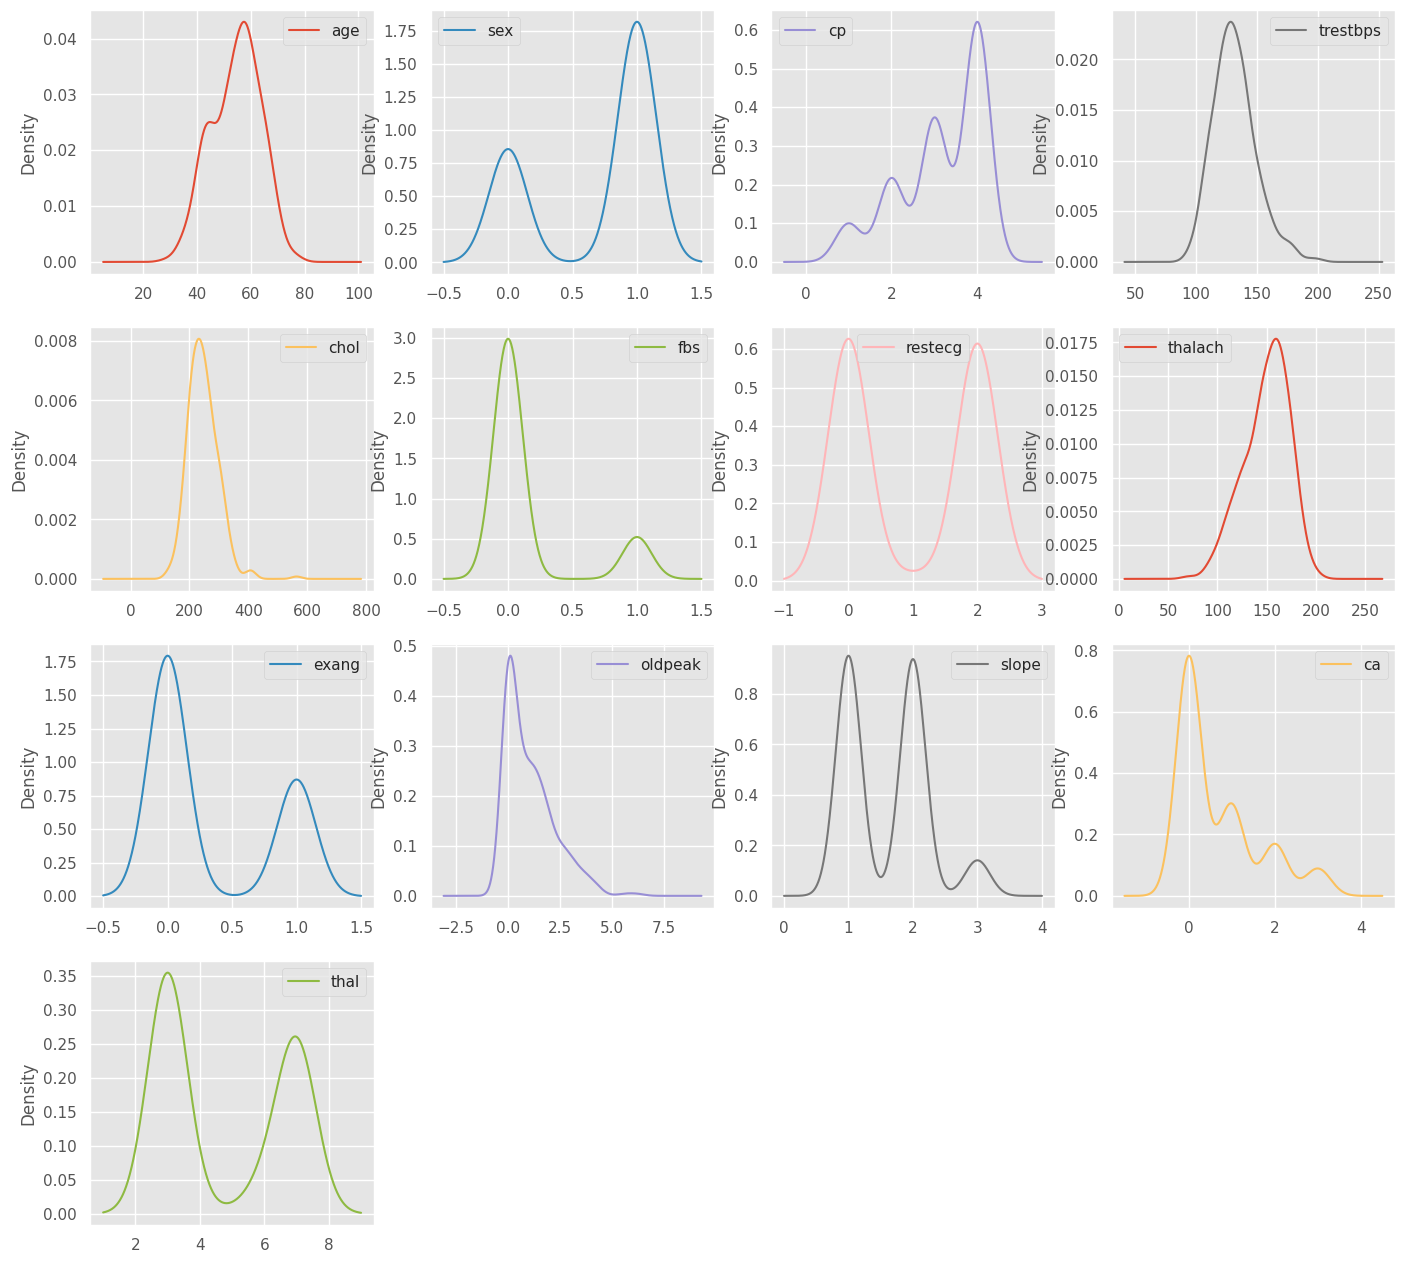

In [ ]:
axes = X.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(15,15))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)

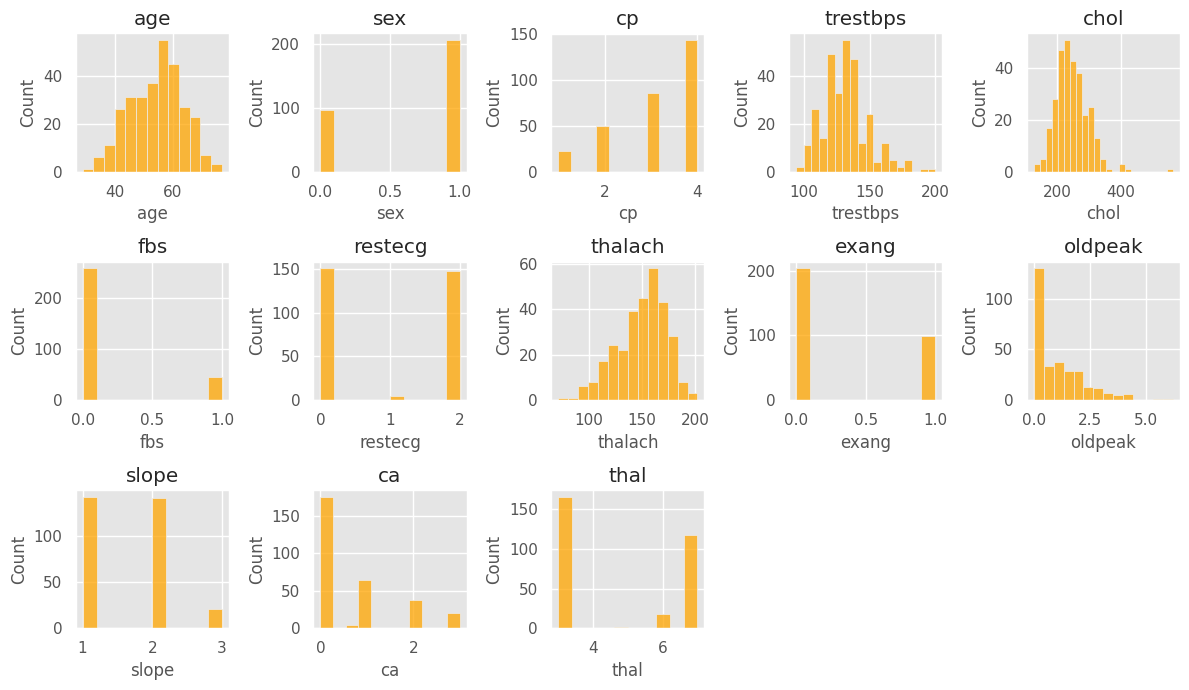

In [ ]:
num_cols = [col for col in X.columns if X[col].dtype != 'object']
# num_cols
plt_no = 1
plt.figure(figsize=(12,7))
for col in num_cols:
      if plt_no <= 13:
        ax=plt.subplot(3,5,plt_no)
        sns.histplot(X[col], color = 'orange')
        ax.set_title(col)
        plt_no+=1
plt.tight_layout()

#### Handling Outliers

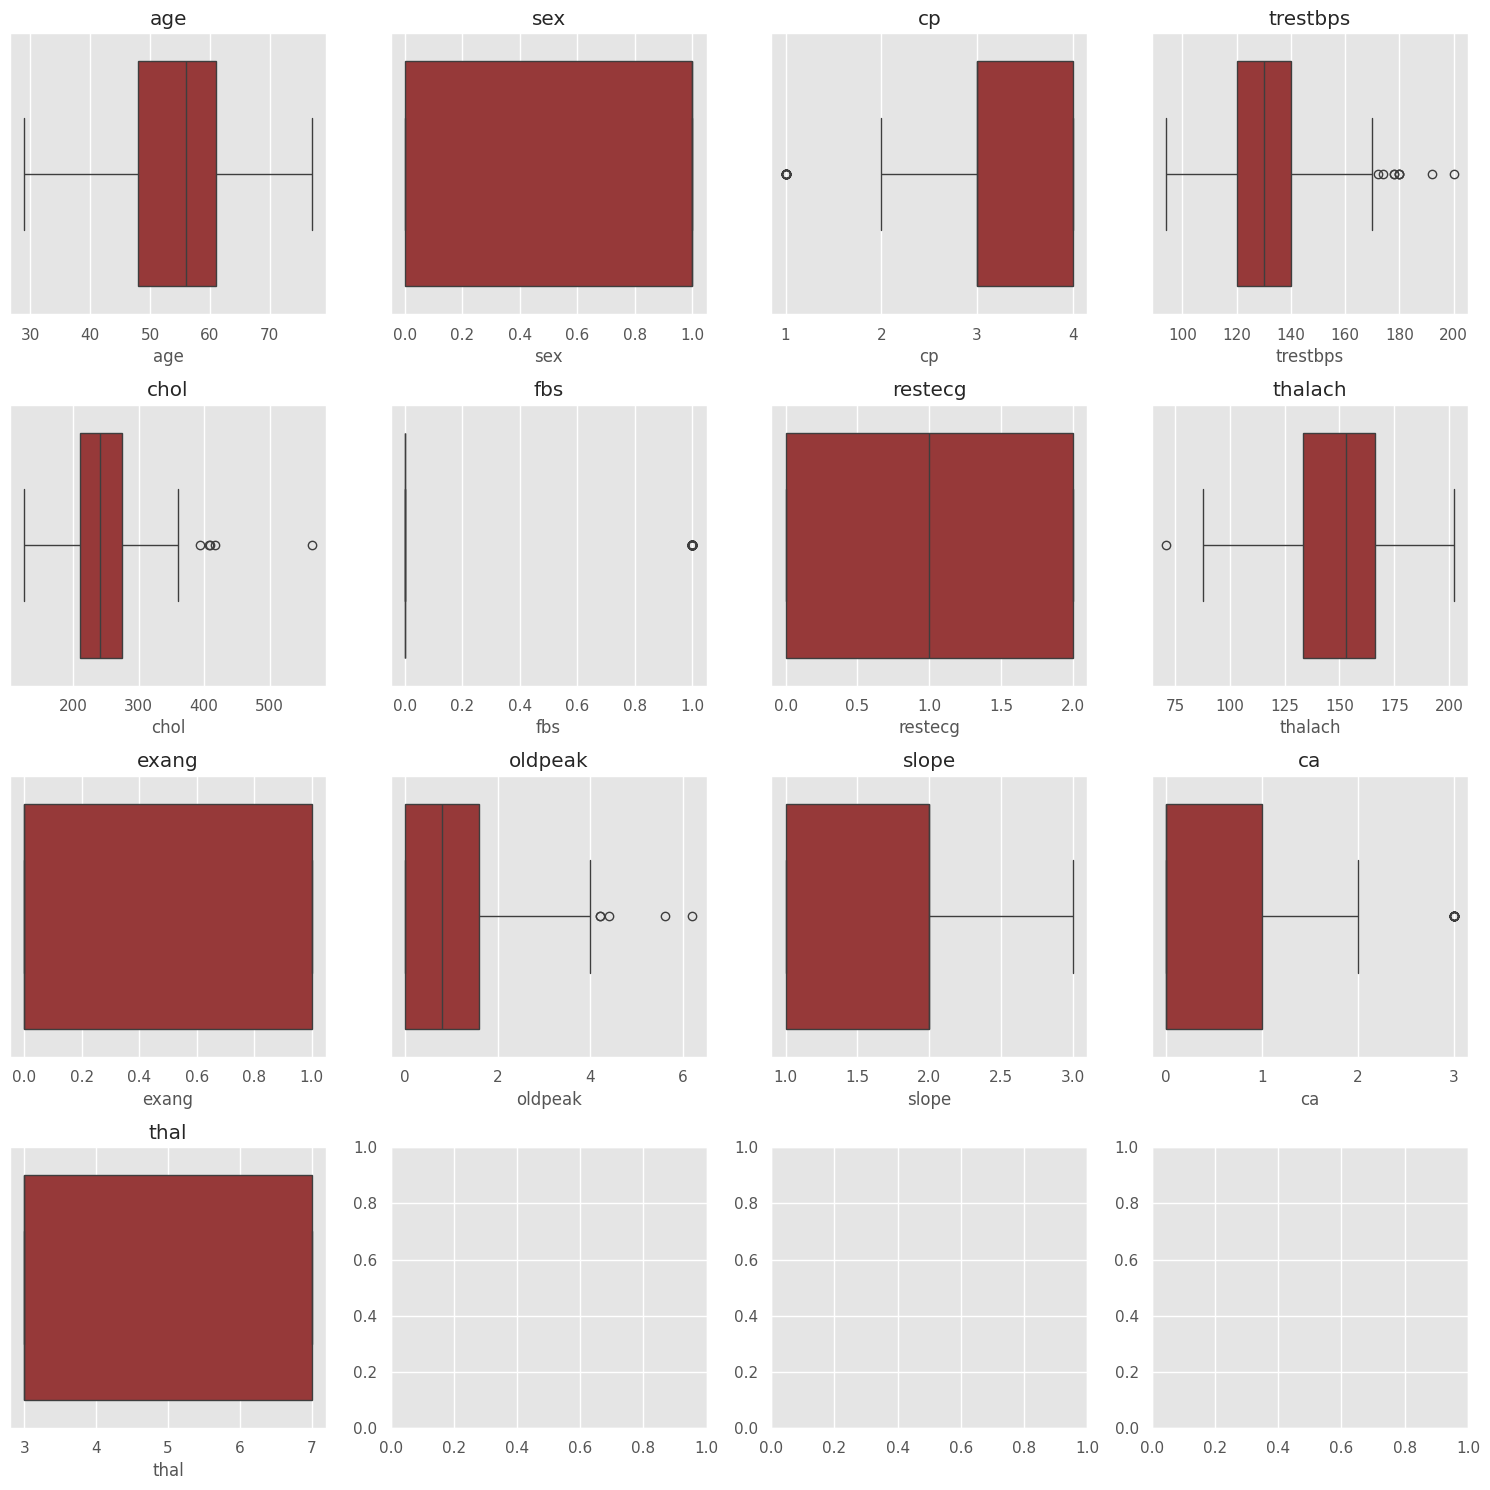

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], color='brown', ax=axes[i//4, i%4]) # Adjust the indexing to match the 4x4 grid
    axes[i//4, i%4].set_title(col)

plt.tight_layout()
plt.show()

We are keeping the outliers as they may have meaningful insights, so they are not removed.

#### Correlation

<Axes: >

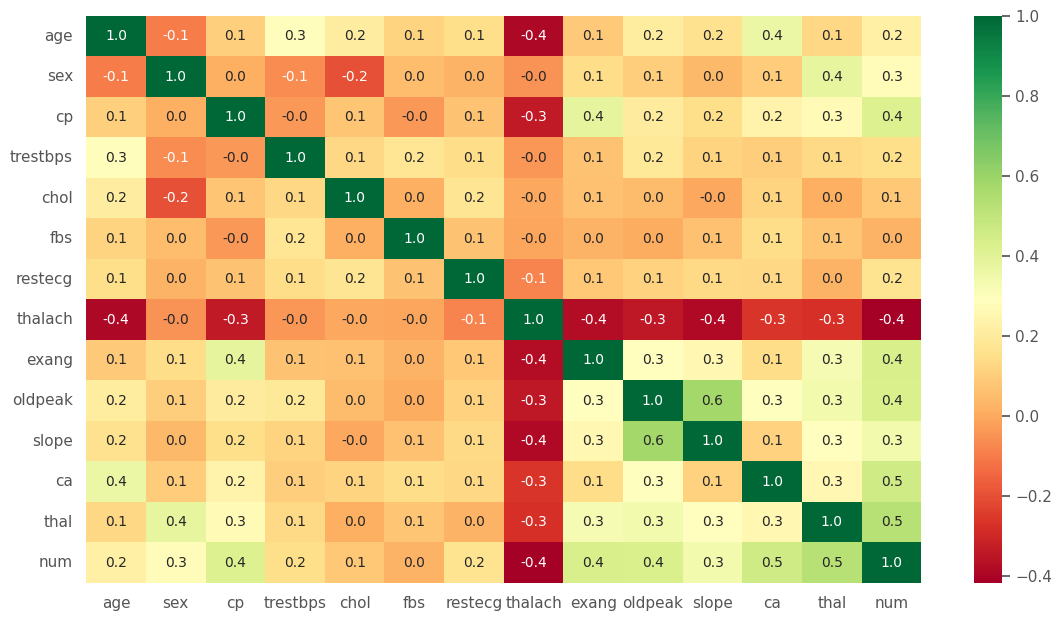

In [ ]:
# Exploring correlations between features

# adding X & y together in new df
df = pd.concat([X,y], axis=1)
# corr plot
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn',fmt='.1f', linecolor='lightgray')

In [ ]:
fig = px.sunburst(df,
                  path=['sex','num'],  # Hierarchical path: Root, Branches, Leaves
                  values='age',               # Values to size the segments
                  color='num',                # Color by 'num'
                  title='Sunburst Plot of Age by Sex, Num',
                  color_continuous_scale='RdBu',  # Color scale
                  )
fig.show()

### Splitting Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
# Standardizing features using standard deviation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Handling Class Imbalances

In [ ]:
# 1: SMOTE

# Initializing SMOTE
# smt = SMOTE(sampling_strategy='not majority')

# class distribution before resampling
# print('Before:', Counter(y_train))
# print('Unique classes in y_train before resampling:', np.unique(y_train, return_counts=True))

# Applying SMOTE to resample the training data
# X_train, y_train = smt.fit_resample(X_train, y_train)

# class distribution after resampling
# print('After:', Counter(y_train))
# print('Unique classes in y_train before resampling:', np.unique(y_train, return_counts=True))


In [ ]:
# 2: RandomUnderSampler

# Initializin RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy='majority')

# class distribution before resampling
# print('Before:', Counter(y_train))

# Applying RandomUnderSampler to resample the training data
# X_train, y_train = rus.fit_resample(X_train, y_train)

# class distribution after resampling
# print('After:', Counter(y_train))



---



## Model Development

### Model Training

Training Logistic Regression...


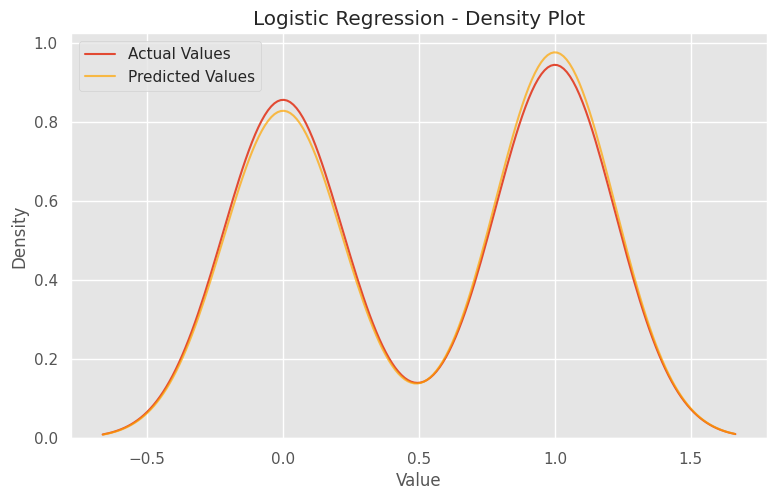

Training Decision Tree...


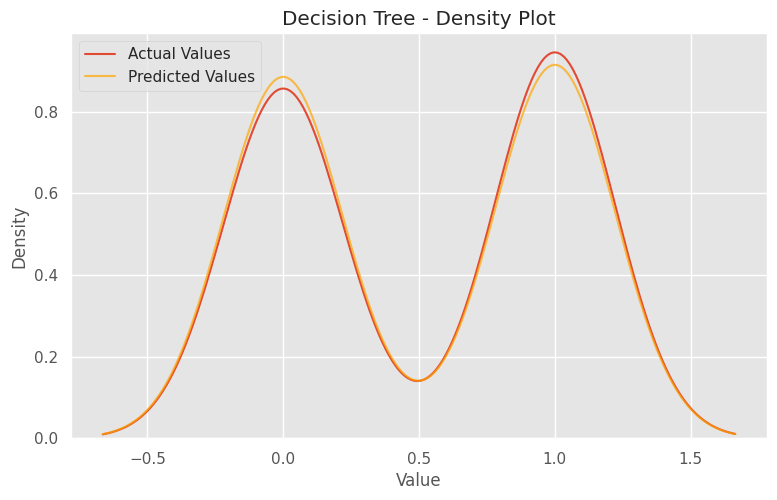

Training Random Forest...


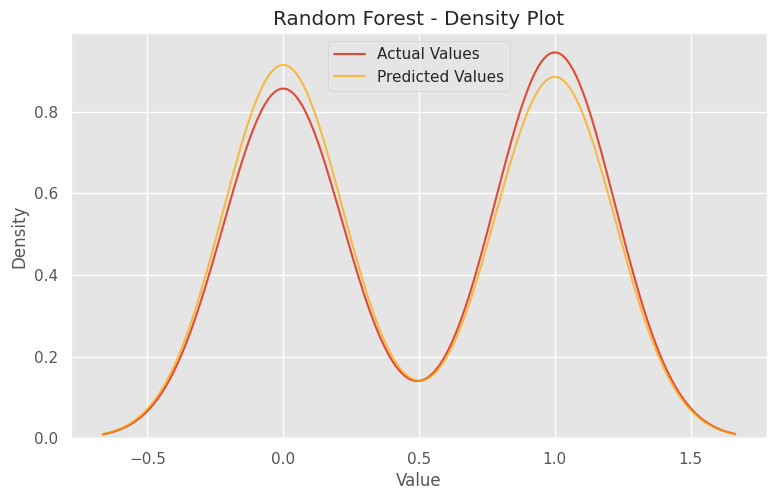

Training SVM...


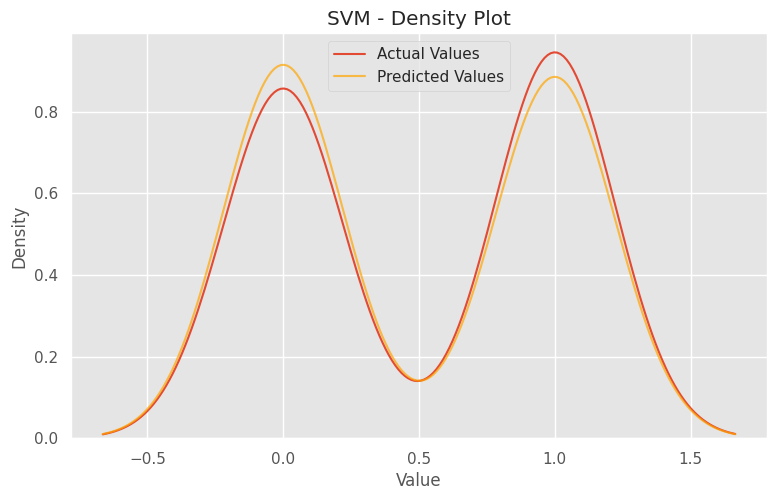

Training KNN...


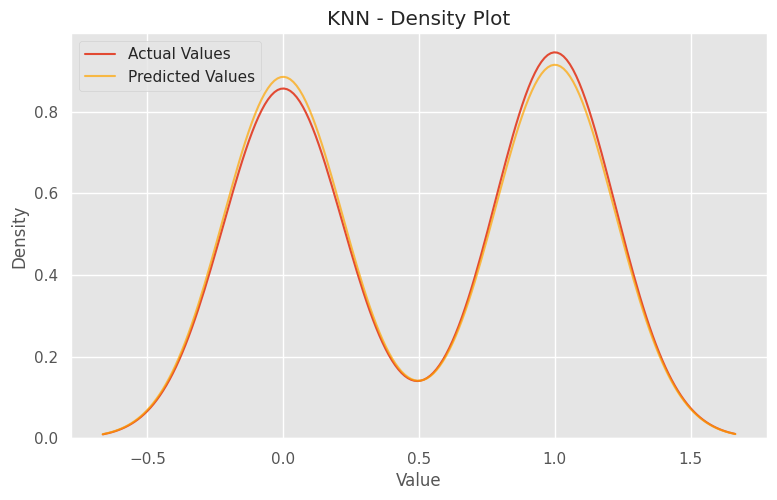

Training Gradient Boosting...


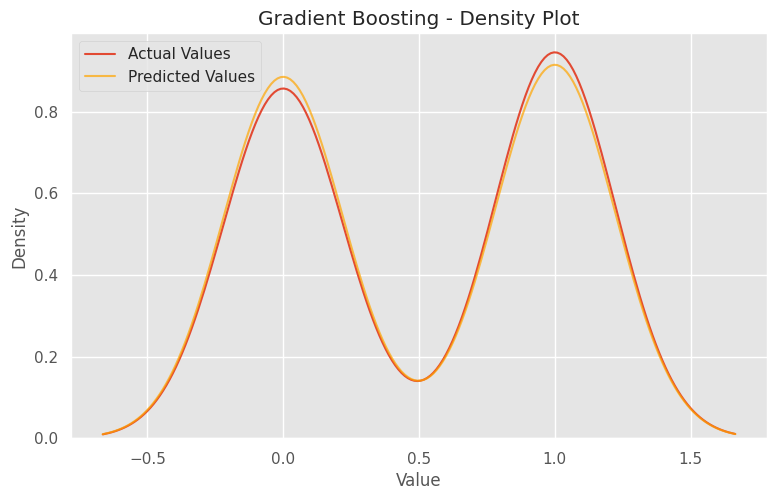

Training XGBoost...


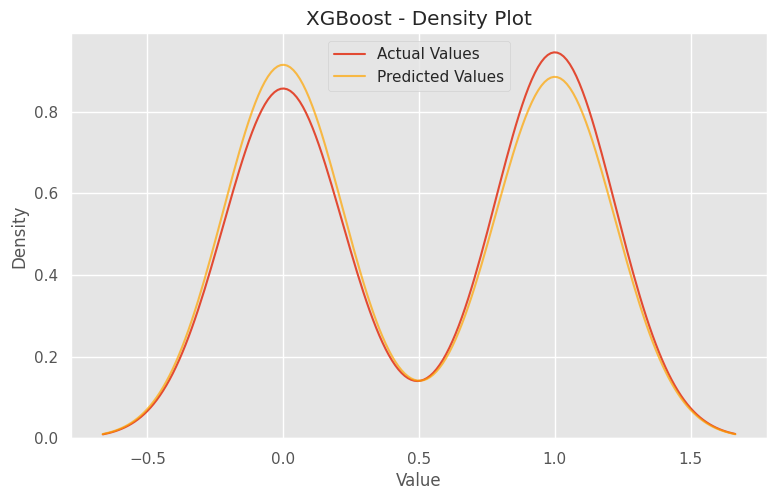

Training AdaBoost...


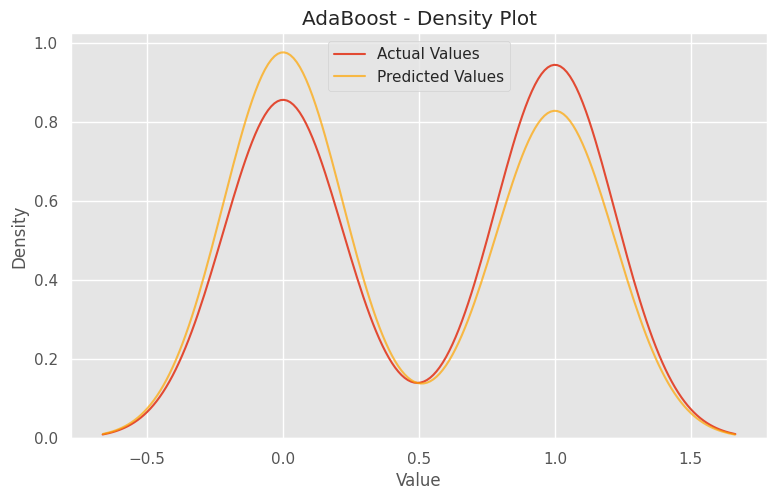

Training Naive Bayes...


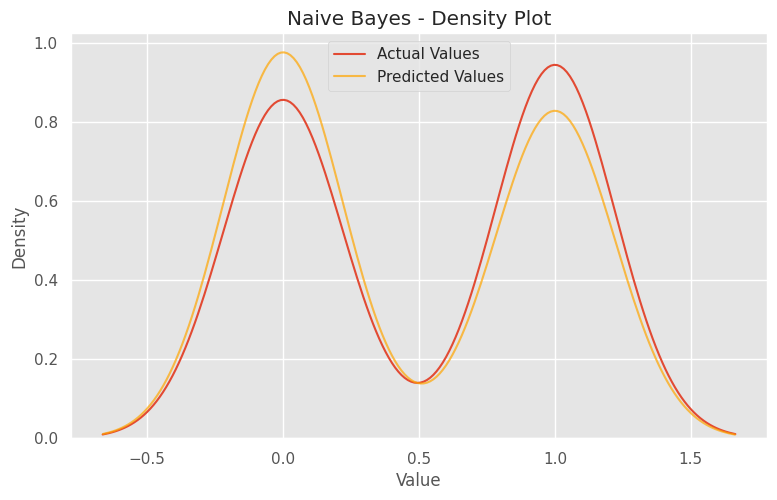

Training LightGBM...


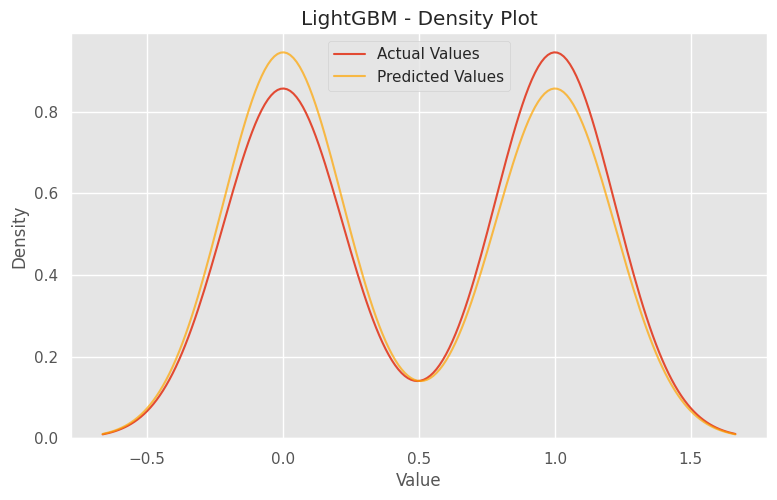

In [ ]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
}

# Training each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plotting density of actual vs. predicted values
    plt.figure(figsize=(8, 5))
    sns.kdeplot(y_test, label='Actual Values', shade=False, color='green')
    sns.kdeplot(y_pred, label='Predicted Values', shade=False, color='orange', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'{name} - Density Plot')
    plt.legend()
    plt.show()

### Model Comparison using LuciferML


In [ ]:
clf = Classification(predictor='all', random_state=42)
clf.fit(X, y.values)
# X,y  --> df,1d array



          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

[LightGBM] [Info] Number of positive: 107, number of negative: 135
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442149 -> in

,Name,Accuracy,KFold Accuracy,Model
0,Logistic Regression,88.524590,81.450000,LogisticRegression()
1,Stochastic Gradient Descent,85.245902,77.683333,SGDClassifier()
2,Perceptron,81.967213,77.716667,Perceptron()
3,Passive Aggressive Classifier,75.409836,79.316667,PassiveAggressiveClassifier()
4,Ridge Classifier,88.524590,83.050000,RidgeClassifier()
5,Support Vector Machine,90.163934,81.033333,SVC()
6,K-Nearest Neighbours,91.803279,78.566667,KNeighborsClassifier()
7,Decision Trees,73.770492,70.283333,DecisionTreeClassifier()
8,Naive Bayes,83.606557,83.083333,GaussianNB()
9,Random Forest Classifier,88.524590,79.350000,"(DecisionTreeClassifier(max_features='sqrt', r..."



Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/classifier/models/Naive_Bayes_1726399975.pkl and its scaler to lucifer_ml_info/best/classifier/scalers/Naive_Bayes_Scaler_1726399975.pkl 

Time Elapsed :  28.34 seconds 



In [ ]:
# result DataFrame
result = clf.result_df
# result
# Sorting the results by KFold Accuracy in descending order and resetting index
result = result.sort_values(by='KFold Accuracy', ascending=False).reset_index(drop=True)
# Displaying the top result
result.iloc[0]

,0
Name,Naive Bayes
Accuracy,83.606557
KFold Accuracy,83.083333
Model,GaussianNB()


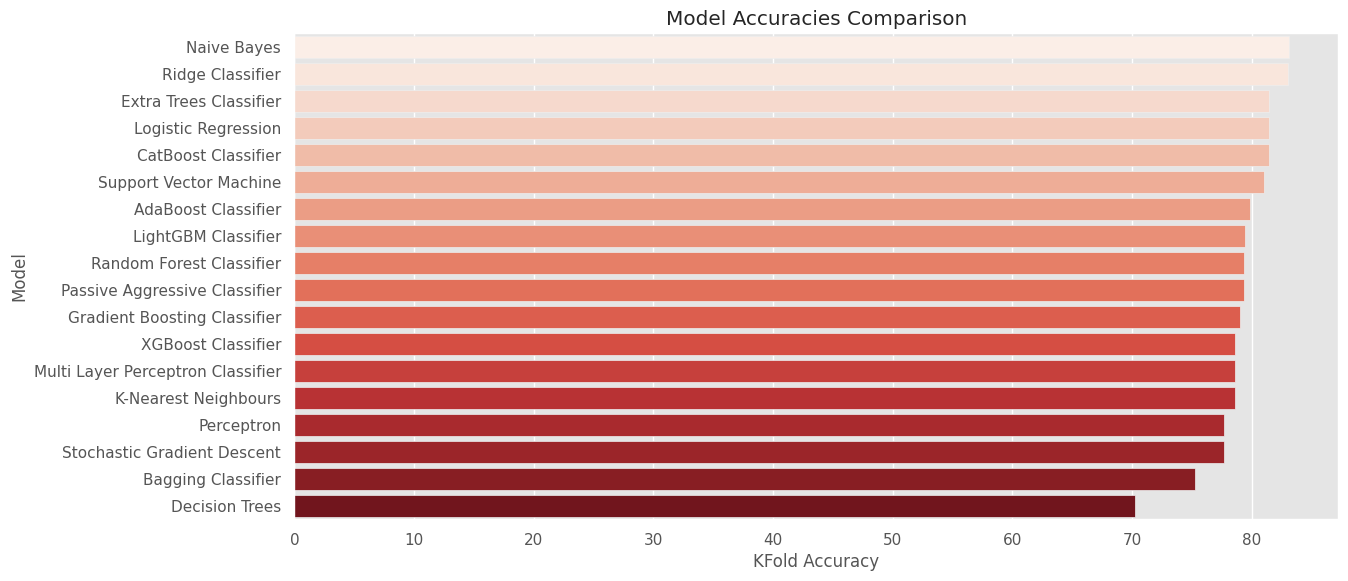

In [ ]:
# Bar plot for model accuracies
fig = plt.figure(figsize=(12, 6))

# Extracting accuracies and model names
model_accuracies = list(result['KFold Accuracy'].values)
model_names = list(result['Name'].values)

# Plotting the accuracies
sns.barplot(x=model_accuracies, y=model_names, palette='Reds')
plt.xlabel('KFold Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracies Comparison')
plt.show()



---



## Model Evaluation

In [ ]:
# Initializing a dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    y_pred = np.round(model.predict(X_test), 2)
    accuracy = np.round(accuracy_score(y_test, y_pred), 2)
    precision = np.round(precision_score(y_test, y_pred, average = 'weighted'), 2)
    recall = np.round(recall_score(y_test, y_pred, average = 'weighted'), 2)
    f_one = np.round(f1_score(y_test, y_pred, average = 'weighted'), 2)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f_one)

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.89,0.89,0.89,0.89
1,Decision Tree,0.75,0.75,0.75,0.75
2,Random Forest,0.90,0.90,0.90,0.90
3,SVM,0.90,0.90,0.90,0.90
4,KNN,0.92,0.92,0.92,0.92
5,Gradient Boosting,0.85,0.85,0.85,0.85
6,XGBoost,0.87,0.87,0.87,0.87
7,AdaBoost,0.84,0.84,0.84,0.84
8,Naive Bayes,0.84,0.84,0.84,0.84
9,LightGBM,0.85,0.86,0.85,0.85


In [ ]:
metrics_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Implementing techniques to improve the model’s performance, such as hyperparameter tuning or cross-validation.

#Implementing Cross-validation
cross_val_results = {}
for name, model in models.items():
  print(f"Cross Validating {name}..")
  scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
  cross_val_results[name] = scores
  print(f"{name} accuracy: {scores.mean():.4f} ± {scores.std():.4f}\n")

for name, scores in cross_val_results.items():
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (± {scores.std():.4f})")


Cross Validating Logistic Regression..
Logistic Regression accuracy: 0.8224 ± 0.0437

Cross Validating Decision Tree..
Decision Tree accuracy: 0.7107 ± 0.0787

Cross Validating Random Forest..
Random Forest accuracy: 0.7851 ± 0.0384

Cross Validating SVM..
SVM accuracy: 0.8222 ± 0.0289

Cross Validating KNN..
KNN accuracy: 0.7810 ± 0.0540

Cross Validating Gradient Boosting..
Gradient Boosting accuracy: 0.7768 ± 0.0481

Cross Validating XGBoost..
XGBoost accuracy: 0.7975 ± 0.0650

Cross Validating AdaBoost..
AdaBoost accuracy: 0.7936 ± 0.0329

Cross Validating Naive Bayes..
Naive Bayes accuracy: 0.8304 ± 0.0448

Cross Validating LightGBM..
LightGBM accuracy: 0.7975 ± 0.0800

Logistic Regression Cross-Validation Accuracy: 0.8224 (± 0.0437)
Decision Tree Cross-Validation Accuracy: 0.7107 (± 0.0787)
Random Forest Cross-Validation Accuracy: 0.7851 (± 0.0384)
SVM Cross-Validation Accuracy: 0.8222 (± 0.0289)
KNN Cross-Validation Accuracy: 0.7810 (± 0.0540)
Gradient Boosting Cross-Validation 



---



In [ ]:
# Application Integration

# Integrate the trained model(s) into a web-based or standalone application that allows users to input data and receive predictions.
# Implement an API or user interface for interacting with the model.


# Scalability and Monitoring

# Ensure that the platform can handle increasing amounts of data and user interactions.
# Implement logging and monitoring to track model performance and application health.


# Documentation (DONE)

# Provide thorough documentation of the model development process, including data preparation, model selection, and performance evaluation.


# Reporting (DONE)

# Prepare a report summarizing the findings, insights, and potential business impact of the predictive analytics.
# Deliver a working AI-powered platform with the ability to make and display predictions.
# Maintain a code repository with detailed documentation and instructions.
# Prepare a final report and presentation explaining the project, methodology, and results.

---
---